In [1]:
# !pip install pyjwt==1.6.4
import getCoinInfo

import os
import jwt
import uuid
import hashlib
from urllib.parse import urlencode
import pandas as pd
import matplotlib.pyplot as plt

import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
#secretKey = '9YJKW1Mf2sbxS49CxK64mAcg1K2jWQlz6nBj03xR'
#accessKey = 'D3lErjSf7TR51Gf79eCC9hwsZBkPajT9lOPxQxsr'

accessKey = '0OZyHGPI4paErDy83m2T0XtXLPZlVL2xbafNpadp'
secretKey = 'V3SPlDriFU1StpEtSIgtfGoiQ9de2hKqkjDkw0wx'

In [3]:
server_url = 'https://api.upbit.com'

payload = {
    'access_key': accessKey,
    'nonce': str(uuid.uuid4()),
}

jwt_token = jwt.encode(payload, secretKey)
authorize_token = 'Bearer {}'.format(jwt_token)
headers = {"Authorization": authorize_token}

res = requests.get(server_url + "/v1/accounts", headers=headers)

print(res.json())

{'error': {'message': '인증된 IP가 아닙니다.', 'name': 'no_authorization_i_p'}}


In [4]:
kor_name_dict = {}

In [5]:
#종목 조회
url = "https://api.upbit.com/v1/market/all"

querystring = {"isDetails":"false"}

response = requests.request("GET", url, params=querystring)

coin_list = response.json()
coins = []
for coin in coin_list:
    if coin['market'].split('-')[0] =='KRW':
        kor_name_dict[coin['market']] = coin['korean_name']
        coins.append(coin['market'])
len(coins)

102

In [6]:
url = "https://api.upbit.com/v1/candles/days"

query = {"count":"1","market": "KRW-BTC"}
# m = hashlib.sha512()
# m.update(urlencode(query).encode())
# query_hash = m.hexdigest()
# payload = {
#     'access_key': accessKey,
#     'nonce': str(uuid.uuid4()),
#     'query_hash': query_hash,
#     'query_hash_alg': 'SHA512'
# }

# jwt_token = jwt.encode(payload, secretKey)
# authorize_token = 'Bearer {}'.format(jwt_token)
# headers = {"Authorization": authorize_token}

response = requests.request("GET", url, params =  query)

print(response.text)

[{"market":"KRW-BTC","candle_date_time_utc":"2021-07-20T00:00:00","candle_date_time_kst":"2021-07-20T09:00:00","opening_price":36799000.00000000,"high_price":36937000.00000000,"low_price":34820000.00000000,"trade_price":35189000.00000000,"timestamp":1626779995867,"candle_acc_trade_price":180058967317.57698000,"candle_acc_trade_volume":5058.26743886,"prev_closing_price":36799000.00000000,"change_price":-1610000.00000000,"change_rate":-0.0437511889}]


In [8]:
df = {}
for coin in coins:
    print(coin)
    df[coin] = getCoinInfo.getCoinDF(coin,30,200,size=24*2*7)
  
df['KRW-BTC']

KRW-BTC
KRW-ETH
KRW-NEO
KRW-MTL
KRW-LTC
KRW-XRP
KRW-ETC
KRW-OMG
KRW-SNT
KRW-WAVES
KRW-XEM
KRW-QTUM
KRW-LSK
KRW-STEEM
KRW-XLM
KRW-ARDR
KRW-ARK
KRW-STORJ
KRW-GRS
KRW-REP
KRW-ADA
KRW-SBD
KRW-POWR
KRW-BTG
KRW-ICX
KRW-EOS
KRW-TRX
KRW-SC
KRW-ONT
KRW-ZIL
KRW-POLY
KRW-ZRX
KRW-LOOM
KRW-BCH
KRW-BAT
KRW-IOST
KRW-RFR
KRW-CVC
KRW-IQ
KRW-IOTA
KRW-MFT
KRW-ONG
KRW-GAS
KRW-UPP
KRW-ELF
KRW-KNC
KRW-BSV
KRW-THETA
KRW-QKC
KRW-BTT
KRW-MOC
KRW-ENJ
KRW-TFUEL
KRW-MANA
KRW-ANKR
KRW-AERGO
KRW-ATOM
KRW-TT
KRW-CRE
KRW-MBL
KRW-WAXP
KRW-HBAR
KRW-MED
KRW-MLK
KRW-STPT
KRW-ORBS
KRW-VET
KRW-CHZ
KRW-STMX
KRW-DKA
KRW-HIVE
KRW-KAVA
KRW-AHT
KRW-LINK
KRW-XTZ
KRW-BORA
KRW-JST
KRW-CRO
KRW-TON
KRW-SXP
KRW-HUNT
KRW-PLA
KRW-DOT
KRW-SRM
KRW-MVL
KRW-STRAX
KRW-AQT
KRW-BCHA
KRW-GLM
KRW-SSX
KRW-META
KRW-FCT2
KRW-CBK
KRW-SAND
KRW-HUM
KRW-DOGE
KRW-STRK
KRW-PUNDIX
KRW-FLOW
KRW-DAWN
KRW-AXS
KRW-STX


,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,unit
0,KRW-BTC,2021-07-20T11:00:00,2021-07-20T20:00:00,35345000,35400000,35189000,35189000,2021-07-20 11:20:00.767,2.364043e+09,66.994671,30
1,KRW-BTC,2021-07-20T10:30:00,2021-07-20T19:30:00,35271000,35350000,35186000,35345000,2021-07-20 10:59:56.312,3.391412e+09,96.121448,30
2,KRW-BTC,2021-07-20T10:00:00,2021-07-20T19:00:00,34909000,35299000,34820000,35271000,2021-07-20 10:29:57.513,1.267238e+10,361.708185,30
3,KRW-BTC,2021-07-20T09:30:00,2021-07-20T18:30:00,35296000,35333000,34876000,34907000,2021-07-20 10:00:00.066,1.540563e+10,439.263961,30
4,KRW-BTC,2021-07-20T09:00:00,2021-07-20T18:00:00,35260000,35391000,35254000,35296000,2021-07-20 09:30:00.052,3.335514e+09,94.509031,30
...,...,...,...,...,...,...,...,...,...,...,...
395,KRW-BTC,2021-07-12T06:00:00,2021-07-12T15:00:00,40217000,40250000,40160000,40214000,2021-07-12 06:29:57.348,1.890472e+09,47.032710,30
396,KRW-BTC,2021-07-12T05:30:00,2021-07-12T14:30:00,40151000,40297000,40133000,40232000,2021-07-12 05:59:57.056,3.624118e+09,90.153953,30
397,KRW-BTC,2021-07-12T05:00:00,2021-07-12T14:00:00,40194000,40215000,40090000,40151000,2021-07-12 05:29:59.448,4.746350e+09,118.213203,30
398,KRW-BTC,2021-07-12T04:30:00,2021-07-12T13:30:00,40400000,40400000,40192000,40194000,2021-07-12 04:59:59.985,7.526068e+09,186.793844,30


In [9]:
for coin in coins:
    df[coin] = df[coin].loc[::-1,:]
    df[coin] = df[coin].reset_index()
    df[coin].drop('index',inplace=True,axis=1)

In [10]:
df['KRW-TFUEL']

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,unit
0,KRW-TFUEL,2021-07-12T04:00:00,2021-07-12T13:00:00,401,402,401,401,2021-07-12 04:29:52.559,5.319243e+08,1.326036e+06,30
1,KRW-TFUEL,2021-07-12T04:30:00,2021-07-12T13:30:00,401,402,400,401,2021-07-12 04:59:59.351,4.230692e+08,1.055218e+06,30
2,KRW-TFUEL,2021-07-12T05:00:00,2021-07-12T14:00:00,401,401,400,400,2021-07-12 05:29:49.286,4.179224e+08,1.043967e+06,30
3,KRW-TFUEL,2021-07-12T05:30:00,2021-07-12T14:30:00,400,402,400,401,2021-07-12 05:59:52.675,2.870375e+08,7.166520e+05,30
4,KRW-TFUEL,2021-07-12T06:00:00,2021-07-12T15:00:00,400,402,400,402,2021-07-12 06:29:59.010,2.347384e+08,5.855505e+05,30
...,...,...,...,...,...,...,...,...,...,...,...
395,KRW-TFUEL,2021-07-20T09:00:00,2021-07-20T18:00:00,278,281,277,278,2021-07-20 09:29:51.899,3.356228e+08,1.200463e+06,30
396,KRW-TFUEL,2021-07-20T09:30:00,2021-07-20T18:30:00,278,278,263,265,2021-07-20 09:59:59.237,1.338938e+09,4.938722e+06,30
397,KRW-TFUEL,2021-07-20T10:00:00,2021-07-20T19:00:00,266,271,264,267,2021-07-20 10:29:59.646,2.443032e+09,9.162870e+06,30
398,KRW-TFUEL,2021-07-20T10:30:00,2021-07-20T19:30:00,267,270,265,269,2021-07-20 10:59:59.980,1.406512e+09,5.262057e+06,30


In [11]:
df_tier = pd.DataFrame(columns=['coin','rate','trade_price'])
df_tier['coin'] = coins
df_tier['name'] = df_tier['coin'].map(kor_name_dict)
df_tier.set_index('coin',inplace=True)

In [12]:
for coin in coins:
    df_tier['rate'].loc[coin]= (df[coin]['trade_price'].loc[len(df[coin])-1] - df[coin]['opening_price'].loc[0])/df[coin]['opening_price'].loc[0] * 100
    df_tier['trade_price'].loc[coin] = df[coin]['candle_acc_trade_price'].mean()/pow(10,8)
    df_tier['tier_val'] = 10*df_tier['rate'] + df_tier['trade_price']
df_tier = df_tier.sort_values(by='tier_val',ascending=False)
df_tier[:20]

,rate,trade_price,name,tier_val
coin,,,,
KRW-REP,-5.583195,38.220111,어거,-17.61184
KRW-GLM,-2.710027,1.587951,골렘,-25.51232
KRW-XEM,-6.206897,23.986506,넴,-38.08246
KRW-HBAR,-5.445545,3.819771,헤데라해시그래프,-50.635675
KRW-AXS,-17.925856,122.708305,엑시인피니티,-56.550259
KRW-TON,-9.359606,20.38071,톤,-73.215349
KRW-BTC,-12.868321,42.791295,비트코인,-85.891912
KRW-TT,-9.552846,5.234988,썬더토큰,-90.293467
KRW-SAND,-16.911765,56.321917,샌드박스,-112.79573


In [13]:
import sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_tier[['tier_val']])
df_tier['tier'] = kmeans.labels_


tier_dict = {}
tier_num = 0

global tier_num

def getTier(x,tier_dict):
    global tier_num
    if not tier_dict.get(x):
        tier_dict[x] = tier_num
        tier_num+=1
    return tier_dict[x]

df_tier['tier']=df_tier['tier'].map(lambda x : getTier(x,tier_dict))
df_tier = df_tier.sort_values(by='tier')
df_tier[:20]

,rate,trade_price,name,tier_val,tier
coin,,,,,
KRW-REP,-5.583195,38.220111,어거,-17.61184,0
KRW-GLM,-2.710027,1.587951,골렘,-25.51232,1
KRW-XEM,-6.206897,23.986506,넴,-38.08246,1
KRW-HBAR,-5.445545,3.819771,헤데라해시그래프,-50.635675,1
KRW-AXS,-17.925856,122.708305,엑시인피니티,-56.550259,2
KRW-TON,-9.359606,20.38071,톤,-73.215349,2
KRW-BTC,-12.868321,42.791295,비트코인,-85.891912,2
KRW-TT,-9.552846,5.234988,썬더토큰,-90.293467,2
KRW-XRP,-18.181818,42.63905,리플,-139.179132,3


<AxesSubplot:xlabel='rate', ylabel='trade_price'>

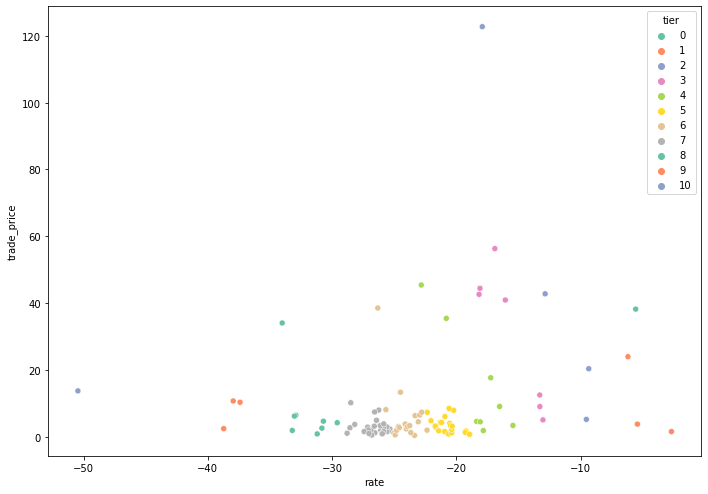

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(ax=ax,x='rate', y='trade_price', hue='tier', data=df_tier, palette="Set2")

In [15]:
from IPython.core.display import display, HTML
from copy import deepcopy

def makeTierMark(x):
    return '<img src= ' + './image/icon-champtier-'+str(x)+'.png' + ' width=22 height=24>'

def makeHTML(feature_df) :    
    feature_df = deepcopy(feature_df)
    feature_df=feature_df.astype(str)
    #feature_df['img'] = 'https://ssl.pstatic.net/imgfinance/chart/mobile/candle/day/'+feature_df['단축코드']+'_end.png'
    #feature_df['img'] = '<img src = \'' + feature_df['img'] + '\' weight=300 height=200>'
    
    feature_df['티어'] =feature_df['티어'].map(lambda x : makeTierMark(x))

    for index,column in enumerate(feature_df.columns):
        feature_df[column] = 'col'+str(index+1)+feature_df[column]
    
    feature_df.columns = ['1 코인','2 상승률','3 거래액(억)','4 티어']

    f=open('./fixed-column-table/Table_Fixed_Column/header.txt', 'r')
    header = f.read()

    f=open('./fixed-column-table/Table_Fixed_Column/js.txt', 'r')
    js = f.read()

    df_html = feature_df.to_html(escape=False)

    df_html = header + df_html + js

    return df_html

In [16]:
df_tier = df_tier.drop('tier_val',axis=1)
df_tier = df_tier.reset_index()
df_tier = df_tier[['name','rate','trade_price','tier']]

In [17]:
df_tier['rate'] = df_tier['rate'].map(lambda x : round(x,2))
df_tier['trade_price'] = df_tier['trade_price'].map(lambda x : round(x,2))
df_tier.columns = ['코인','등락률','거래액(억)','티어']
html = makeHTML(df_tier[:20])
html = html.replace('<table border=\"1\" class=\"dataframe\">','<table>')
html=html.replace('<tr','<tr class=\"row100 body\"')

for index,column in enumerate(df_tier.columns):
    html=html.replace('<td>col'+str(index+1),'<td class=\"cell100 column'+str(index+1)+'\">')
    html=html.replace('<th>'+str(index+1)+' ','<th class=\"cell100 column'+str(index+1)+'\">')
HTML(html)

,코인,상승률,거래액(억),티어
0,어거,-5.58,38.22,
1,골렘,-2.71,1.59,
2,넴,-6.21,23.99,
3,헤데라해시그래프,-5.45,3.82,
4,엑시인피니티,-17.93,122.71,
5,톤,-9.36,20.38,
6,비트코인,-12.87,42.79,
7,썬더토큰,-9.55,5.23,
8,리플,-18.18,42.64,
9,이더리움,-18.11,44.44,


In [18]:
with open('./fixed-column-table/Table_Fixed_Column/html_file.html', 'w',encoding='utf-8') as f:
    f.write(html)